In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import GoH.reports
import GoH.utilities
import GoH.clean
import GoH.normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = GoH.utilities.create_spelling_dictionary(wordlists, wordlist_dir)

In [7]:
title = "NMN"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/NMN/baseline

Average verified rate: 0.8992190982814151

Average of error rates: 0.10566570605187318

Total token count: 199641



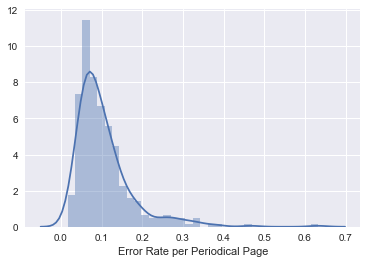

In [10]:
stats = GoH.reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = GoH.reports.get_errors_summary( stats )
GoH.reports.top_errors( errors_summary, 50 )

[('-', 916),
 ('e', 500),
 ('¥', 337),
 ('t', 323),
 ("'", 250),
 ('th', 244),
 ('r', 207),
 ('n', 204),
 ('w', 198),
 ('--', 191),
 (')', 158),
 ('m', 153),
 ('d', 140),
 ('f', 140),
 ('/', 130),
 ('g', 108),
 ('aro', 89),
 ('(', 82),
 ('u', 78),
 ('bo', 72),
 ('wo', 64),
 ('k', 63),
 ('co', 53),
 ('re', 51)]

## Review Special Character Use

In [12]:
GoH.reports.tokens_with_special_characters(errors_summary)[:100]

[('¥', 337),
 (')', 158),
 ('/', 130),
 ('(', 82),
 ('*', 47),
 ('_', 44),
 ('ñ', 35),
 ('%', 34),
 ('+', 34),
 ('¥¥¥¥', 32),
 ('¥¥¥¥¥', 23),
 ('¥¥', 21),
 ('¥¥¥', 19),
 ('•', 15),
 ('#', 9),
 ('()', 8),
 ('(a)', 8),
 ('¥¥¥¥¥¥', 7),
 ('(the', 7),
 ('`', 7),
 ('/per', 7),
 ('(to', 7),
 ('__', 6),
 ('(b)', 6),
 ('\ufeff', 6),
 ("')", 6),
 ('¡', 6),
 ('(c)', 5),
 (']', 5),
 ('=', 5),
 ('(for', 5),
 ('/t', 4),
 ('-¥', 4),
 ('(i', 4),
 ('continued)', 4),
 ('ò', 4),
 ('¥¥¥¥¥¥¥¥¥', 4),
 ('^', 3),
 (')-', 3),
 ('e)', 3),
 ('~~', 3),
 ('(continued', 3),
 ('-_', 3),
 ('work*', 3),
 ('(f)', 3),
 ('t¥', 3),
 ('♦', 3),
 ('f_', 3),
 ('r)', 3),
 ('ã', 3),
 ('al]', 3),
 ("%'", 2),
 ('-)f', 2),
 ('(col', 2),
 ('(appointed)', 2),
 ('re/', 2),
 ('wil_', 2),
 ('s¥', 2),
 ('of_', 2),
 ('/each', 2),
 ('fir/', 2),
 ('_-', 2),
 ('*me', 2),
 ('the)', 2),
 ("'¥", 2),
 ('student)', 2),
 ('¥¥¥¥¥¥¥¥¥¥¥', 2),
 (')er', 2),
 ('_s', 2),
 ('(acts', 2),
 ('(new', 2),
 ('_of', 2),
 ('in(', 2),
 ('bank)', 2),
 ('(d)', 2),

## Correction 1 -- Normalize Character Use

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 1

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/NMN/correction1

Average verified rate: 0.9070753720305472

Average of error rates: 0.09680691642651297

Total token count: 198774



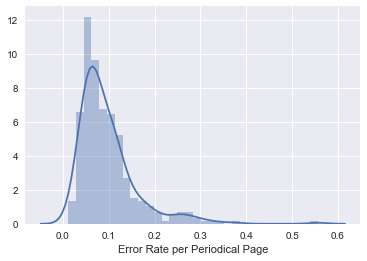

In [14]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 959),
 ('e', 529),
 ('t', 342),
 ("'", 274),
 ('th', 246),
 ('r', 224),
 ('n', 212),
 ('w', 204),
 ('--', 199),
 ('f', 156),
 ('m', 155),
 ('d', 150),
 ('g', 110),
 ('aro', 89),
 ('u', 82),
 ('bo', 72),
 ('k', 66),
 ('wo', 64),
 ('re', 57),
 ('co', 54),
 ('x', 36),
 ('tc', 36),
 ('se', 33),
 ('---', 30),
 ('te', 29),
 ('al', 28),
 ('leetsville', 28),
 ('li', 28),
 ('es', 28),
 ('ie', 28),
 ("canvassers'", 27),
 ('mt', 27),
 ('nd', 27),
 ('z', 26),
 ('willaman', 26),
 ('tt', 25),
 ('con-', 25),
 ('ti', 24),
 ('--o--', 22),
 ('ft', 21),
 ('--selected', 20),
 ('ne', 20),
 ('soo', 20),
 ('ce', 19),
 ("elders'", 19),
 ('q', 19),
 ('myrta', 18),
 ('rs', 18),
 ('altho', 18),
 ('ly', 17)]

## Correction 2 -- Fix Line Endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 2

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/NMN/correction2

Average verified rate: 0.9108103059158542

Average of error rates: 0.09321037463976946

Total token count: 198061



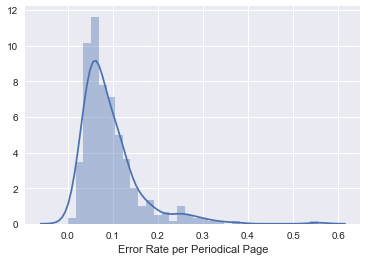

In [17]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 946),
 ('e', 528),
 ('t', 341),
 ("'", 274),
 ('th', 246),
 ('r', 223),
 ('n', 212),
 ('w', 203),
 ('--', 199),
 ('f', 155),
 ('m', 154),
 ('d', 149),
 ('g', 110),
 ('aro', 89),
 ('u', 81),
 ('bo', 71),
 ('k', 66),
 ('wo', 64),
 ('re', 57),
 ('co', 54),
 ('tc', 36),
 ('x', 36),
 ('se', 33),
 ('---', 30),
 ('te', 29),
 ('es', 28),
 ('li', 28),
 ('ie', 28),
 ('leetsville', 28),
 ("canvassers'", 27),
 ('mt', 27),
 ('nd', 27),
 ('z', 26),
 ('willaman', 26),
 ('tt', 25),
 ('ti', 24),
 ('al', 23),
 ('--o--', 22),
 ('ft', 21),
 ('ne', 20),
 ('--selected', 20),
 ('soo', 20),
 ('ce', 19),
 ("elders'", 19),
 ('q', 19),
 ('myrta', 18),
 ('altho', 18),
 ('rs', 18),
 ('ca', 17),
 ('il', 16)]

## Correction 3 -- Remove Extra Dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction3"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

NMN19070108-V03-01-page1.txt: [('--Selected.', '-Selected.'), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', '')]
NMN19070108-V03-01-page2.txt: [('neighbor-', 'neighbor'), ('no-', 'no'), ('-.', '.'), ('Zn-', 'Zn')]
NMN19070108-V03-01-page3.txt: [('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-.', '.'), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('--', '-'), ('-', ''), ('-', '')]
NMN19070108-V03-01-page4.txt: [('t-', 't')]
NMN19070129-V03-02-page1.txt: [('e-ooCOOoo--', 'e-ooCOOoo-'), ('-', ''), ('hone-', 'hone'), ('-', ''), ('p.-', 'p.'), ('-heir', 'heir')]
NMN19070129-V03-02-page2.txt: [('--', '-'), ('-e', 'e'), ('--o--', '-o--')]
NMN19070129-V03-02-page3.txt: [('--', '-'), ('--', '-'), ('--', '-'), ('-the', 'the')]
NMN19070129-V03-02

## Check Correction 3

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/NMN/correction3

Average verified rate: 0.9186944190255666

Average of error rates: 0.08445244956772334

Total token count: 197797



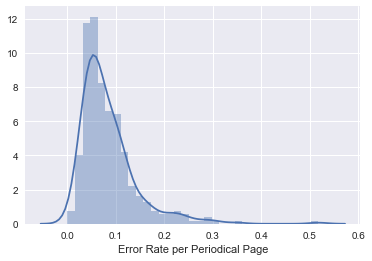

In [20]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 557),
 ('t', 371),
 ("'", 289),
 ('th', 256),
 ('r', 236),
 ('n', 224),
 ('w', 208),
 ('f', 159),
 ('m', 157),
 ('d', 154),
 ('g', 111),
 ('aro', 89),
 ('u', 83),
 ('co', 73),
 ('bo', 73),
 ('re', 69),
 ('-', 69),
 ('k', 68),
 ('wo', 66),
 ('se', 38),
 ('x', 38),
 ('tc', 36),
 ('te', 33),
 ('nd', 31),
 ('es', 29),
 ('ti', 29),
 ('z', 28),
 ('li', 28),
 ('ie', 28),
 ('leetsville', 28),
 ("canvassers'", 27),
 ('mt', 27),
 ('al', 27),
 ('tt', 26),
 ('willaman', 26),
 ('ft', 23),
 ('ay', 23),
 ('ne', 20),
 ('ce', 20),
 ('soo', 20),
 ('q', 20),
 ('il', 19),
 ("elders'", 19),
 ('myrta', 18),
 ('ee', 18),
 ('altho', 18),
 ('rs', 18),
 ('ca', 17),
 ('ro', 17),
 ('tr', 16)]

## Correction 4 -- Remove Extra Quotation Marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
        print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = GoH.clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

NMN19070108-V03-01-page1.txt: [("'calling", 'calling'), ("'ICH.", 'ICH.')]
NMN19070108-V03-01-page2.txt: [("'interesting.", 'interesting.'), ("'I", 'I')]
NMN19070129-V03-02-page1.txt: [("'What", 'What'), ("'work", 'work'), ("'There", 'There')]
NMN19070129-V03-02-page4.txt: [("'bay", 'bay')]
NMN19070129-V03-02-page6.txt: [("'Society", 'Society'), ("'Menominee", 'Menominee')]
NMN19070219-V03-03-page1.txt: [("'E", 'E')]
NMN19070219-V03-03-page5.txt: [("'rith", 'rith')]
NMN19070312-V03-04-page1.txt: [("'LICH.", 'LICH.')]
NMN19070401-V03-05-page3.txt: [("'.hat", '.hat'), ("'io", 'io')]
NMN19070401-V03-05-page7.txt: [("'NOTIC", 'NOTIC')]
NMN19070401-V03-05-page8.txt: [("'sets.", 'sets.')]
NMN19070423-V03-06-page1.txt: [("'with", 'with'), ("'you", 'you')]
NMN19070423-V03-06-page6.txt: [("'t", 't'), ("'wing", 'wing')]
NMN19070514-V03-07-page1.txt: [("'The", 'The')]
NMN19070514-V03-07-page2.txt: [("'soreheads'.", 'soreheads.')]
NMN19070514-V03-07-page6.txt: [("'We", 'We'), ("'I", 'I'), ("'The",

## Check Correction 4

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/NMN/correction4

Average verified rate: 0.9202623368611607

Average of error rates: 0.08289913544668587

Total token count: 197761



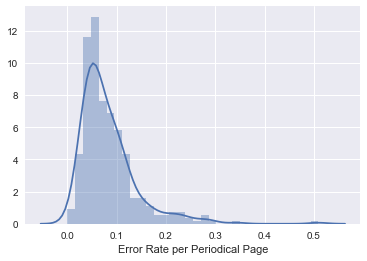

In [23]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 571),
 ('t', 379),
 ('th', 256),
 ('r', 237),
 ("'", 236),
 ('n', 224),
 ('w', 210),
 ('f', 163),
 ('m', 157),
 ('d', 155),
 ('g', 111),
 ('aro', 89),
 ('u', 83),
 ('co', 74),
 ('bo', 73),
 ('re', 70),
 ('-', 69),
 ('k', 68),
 ('wo', 67),
 ('se', 40),
 ('x', 38),
 ('tc', 36),
 ('te', 34),
 ('nd', 31),
 ('es', 29),
 ('ti', 29),
 ('z', 28),
 ('li', 28),
 ('ie', 28),
 ('leetsville', 28),
 ("canvassers'", 27),
 ('al', 27),
 ('mt', 27),
 ('tt', 26),
 ('willaman', 26),
 ('ft', 23),
 ('ay', 23),
 ('ne', 21),
 ('ce', 20),
 ('ee', 20),
 ('soo', 20),
 ('q', 20),
 ('il', 19),
 ('myrta', 18),
 ("elders'", 18),
 ('altho', 18),
 ('rs', 18),
 ('ca', 17),
 ('ro', 17),
 ('tr', 16)]

## Correction 5 -- Rejoin Burst Words

In [25]:
# %load shared_elements/rejoin_burst_words.py
prev = cycle
cycle = "correction5"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    GoH.clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

NMN19070312-V03-04-page1.txt: [(' C O N F E R E N C E ', 'CONFERENCE')]
NMN19080512-V04-07-page7.txt: [('Ii', 'Ii')]
NMN19081027-V04-15-page1.txt: [(' S H E E T\n', 'SHEET')]
NMN19090215-V05-02-page1.txt: [(' S H E E T\n', 'SHEET')]
NMN19090215-V05-02-page7.txt: [('In', 'In')]
NMN19090715-V05-07-page1.txt: [('\nh E N C E\n', 'hENCE')]
NMN19090812-V05-08-page6.txt: [('No', 'No')]
NMN19090915-V05-09-page1.txt: [('Be', 'Be')]
NMN19100120-V06-01-page5.txt: [('It', 'It'), ('It', 'It')]
NMN19100224-V06-02-page5.txt: [('As', 'As')]


## Check Correction 5

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/NMN/correction5

Average verified rate: 0.9203216263369491

Average of error rates: 0.08282997118155619

Total token count: 197745



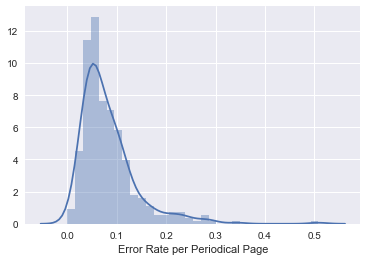

In [26]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 562),
 ('t', 377),
 ('th', 256),
 ("'", 236),
 ('r', 236),
 ('n', 221),
 ('w', 210),
 ('f', 162),
 ('m', 157),
 ('d', 155),
 ('g', 111),
 ('aro', 89),
 ('u', 83),
 ('co', 74),
 ('bo', 73),
 ('re', 70),
 ('-', 69),
 ('k', 68),
 ('wo', 67),
 ('se', 40),
 ('x', 38),
 ('tc', 36),
 ('te', 34),
 ('nd', 31),
 ('es', 29),
 ('ti', 29),
 ('z', 28),
 ('li', 28),
 ('ie', 28),
 ('leetsville', 28),
 ("canvassers'", 27),
 ('al', 27),
 ('mt', 27),
 ('tt', 26),
 ('willaman', 26),
 ('ft', 23),
 ('ay', 23),
 ('ne', 21),
 ('ce', 20),
 ('ee', 20),
 ('soo', 20),
 ('q', 20),
 ('il', 19),
 ('myrta', 18),
 ("elders'", 18),
 ('altho', 18),
 ('rs', 18),
 ('ca', 17),
 ('ro', 17),
 ('tr', 16)]

## Correction 6 -- Rejoin Split Words

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

NMN19070108-V03-01-page2.txt: [('te', 'r')]
NMN19070108-V03-01-page4.txt: [('th', 'at'), ('bo', 'A')]
NMN19070129-V03-02-page6.txt: [('co', 'well'), ('Soci', 'ety')]
NMN19070219-V03-03-page1.txt: [('SI', 'C')]
NMN19070219-V03-03-page3.txt: [('OBITUAR', 'Y')]
NMN19070312-V03-04-page1.txt: [('wo', 'ld')]
NMN19070401-V03-05-page1.txt: [('MICHIG', 'AN')]
NMN19070401-V03-05-page4.txt: [('th', 'at')]
NMN19070401-V03-05-page5.txt: [('co', 'operate')]
NMN19070401-V03-05-page7.txt: [('IC', 'Ed')]
NMN19070423-V03-06-page3.txt: [('responsibl', 'e')]
NMN19070514-V03-07-page3.txt: [('distrib', 'uted')]
NMN19070514-V03-07-page5.txt: [('Ra', 'ds')]
NMN19070604-V03-08-page3.txt: [('co', 'operation')]
NMN19070716-V03-10-page2.txt: [('th', 'a'), ('grat', 'ifying')]
NMN19070716-V03-10-page4.txt: [('camp-', 'meeting'), ('ne', 'cessary')]
NMN19070716-V03-10-page5.txt: [('ca', 'en')]
NMN19070813-V03-11-page1.txt: [('SHEE', 'T')]
NMN19070813-V03-11-page6.txt: [('Peo', 'ple')]
NMN19070813-V03-11-page7.txt: [(

## Check Correction 6

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/NMN/correction6

Average verified rate: 0.9211084291013243

Average of error rates: 0.08189625360230549

Total token count: 197613



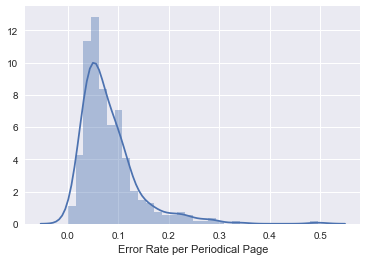

In [29]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 554),
 ('t', 372),
 ('th', 248),
 ("'", 236),
 ('r', 234),
 ('n', 218),
 ('w', 210),
 ('f', 162),
 ('m', 156),
 ('d', 155),
 ('g', 111),
 ('aro', 89),
 ('u', 83),
 ('-', 69),
 ('k', 68),
 ('bo', 67),
 ('wo', 66),
 ('co', 62),
 ('re', 59),
 ('se', 38),
 ('x', 38),
 ('tc', 36),
 ('nd', 31),
 ('te', 31),
 ('z', 28),
 ('li', 28),
 ('leetsville', 28),
 ("canvassers'", 27),
 ('es', 27),
 ('mt', 27),
 ('ie', 27),
 ('al', 26),
 ('tt', 26),
 ('willaman', 26),
 ('ft', 23),
 ('ti', 23),
 ('ay', 21),
 ('ce', 20),
 ('ee', 20),
 ('q', 20),
 ('soo', 19),
 ('il', 18),
 ('myrta', 18),
 ("elders'", 18),
 ('altho', 18),
 ('rs', 18),
 ('ne', 18),
 ('tr', 16),
 ('id', 16),
 ('ea', 16)]

## Correction 7 -- Rejoin Split Words II

In [31]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction7"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

NMN19070108-V03-01-page4.txt: [('A', 'Tt')]
NMN19070129-V03-02-page6.txt: [('the', 're')]
NMN19070312-V03-04-page1.txt: [('h', "aven's"), ('for', 'th'), ('wo', 'ld')]
NMN19070312-V03-04-page4.txt: [('a', 'id')]
NMN19070401-V03-05-page1.txt: [('Confer', 'ence')]
NMN19070401-V03-05-page3.txt: [('Ho', 'rt')]
NMN19070401-V03-05-page7.txt: [('a', 'id')]
NMN19070514-V03-07-page1.txt: [('C', 'ONFERENCE'), ('mission', 'ary'), ('plain', 'ly')]
NMN19070514-V03-07-page5.txt: [('Ra', 'ds')]
NMN19070625-V03-09-page5.txt: [('wonder', 'ful'), ('be', 'rm'), ('car', 'ded')]
NMN19070716-V03-10-page2.txt: [('tho', 'th')]
NMN19070716-V03-10-page4.txt: [('can', 'ey')]
NMN19070813-V03-11-page1.txt: [('box', 'es')]
NMN19070813-V03-11-page7.txt: [('THE', 'CA')]
NMN19071008-V03-13-page2.txt: [('C', 'AL')]
NMN19071029-V03-14-page1.txt: [('for', 'ay'), ('k', 'ep')]
NMN19071029-V03-14-page4.txt: [('dona', 'tions')]
NMN19071029-V03-14-page5.txt: [('N', 'th')]
NMN19071119-V03-15-page1.txt: [('N', 'EWS')]
NMN1907111

## Review Remaining Errors

In [32]:
GoH.reports.docs_with_high_error_rate(summary)

[('NMN19100120-V06-01-page5.txt', 0.495),
 ('NMN19090715-V05-07-page6.txt', 0.34),
 ('NMN19090915-V05-09-page2.txt', 0.297),
 ('NMN19090915-V05-09-page9.txt', 0.285),
 ('NMN19091209-V05-12-page5.txt', 0.281),
 ('NMN19090812-V05-08-page8.txt', 0.269),
 ('NMN19091015-V05-10-page3.txt', 0.26),
 ('NMN19091209-V05-12-page6.txt', 0.243),
 ('NMN19090915-V05-09-page8.txt', 0.24),
 ('NMN19091209-V05-12-page8.txt', 0.234),
 ('NMN19071029-V03-14-page1.txt', 0.232),
 ('NMN19091209-V05-12-page7.txt', 0.225),
 ('NMN19090812-V05-08-page6.txt', 0.223),
 ('NMN19091209-V05-12-page1.txt', 0.217),
 ('NMN19091015-V05-10-page6.txt', 0.211),
 ('NMN19090812-V05-08-page1.txt', 0.211),
 ('NMN19071008-V03-13-page5.txt', 0.21)]

In [33]:
# %load shared_elements/high_error_rates.py
doc_keys = [x[0] for x in GoH.reports.docs_with_high_error_rate(summary) if x[1] > 0.3]

# GoH.utilities.open_original_docs(doc_keys, directories['cycle'])

Two documents with high errors are tables and very faint typeface.

In [34]:
GoH.reports.long_errors(errors_summary, min_length=15)

(['superintendentswritos',
  "sabbatheschool''was",
  'supplementinwhat',
  'mieeinaaryelrerikeelth',
  'wavarorinarngwommannlp',
  "the'thirtyaeight",
  'miscellamiousoil',
  'sleeeliameeelenql',
  'amongthealationa',
  'gasfeemalielfteesebefile',
  'notwhithstanding',
  'publisherevdonreby-awnh',
  'temperliterature',
  'logibtrationwilli',
  'of-the-lecuvantixinwe',
  'buthishandisuper',
  'importanceofthis',
  'volunteerreading',
  'illastrertedieracring',
  "beautifully'illustrated",
  'theeopportemities',
  'vluatletestimony',
  'teetureetiatee-all',
  'hidingthomsolvus',
  'spirit--meekness',
  'countor-campaign',
  'faithfulconference',
  'reccmuiendations',
  "committees'appointed",
  'spiritually-minded',
  'hichigaagernference',
  'individvalwastos',
  'wmgeleftremodimarm',
  'whisperedtemptationsoftheenemyenticethemtosin',
  'mierepreeentations',
  "cannot'sympathize",
  'edacationalaeork',
  'iialispeakingsevisoofe',
  'petoskey-october',
  'gemerarconserance',
  'nothwith

## Correction 8 -- Separate Squashed Errors

In [35]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction8"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = GoH.utilities.readfile(directories['prev'], filename)
    GoH.normalize.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = GoH.utilities.strip_punct(content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = GoH.normalize.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if GoH.normalize.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

NMN19071008-V03-13-page6.txt: [('faithfulConference', 'faithful Conference')]
NMN19100120-V06-01-page2.txt: [('IIALIspeakingSevisoofe', 'II A L I speaking S e v i s o o f e')]


## Review Correction 8

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/NMN/correction8

Average verified rate: 0.9216250151889506

Average of error rates: 0.08140345821325648

Total token count: 197512



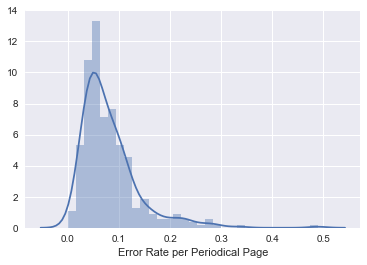

In [36]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [37]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 552),
 ('t', 370),
 ('th', 245),
 ("'", 236),
 ('r', 232),
 ('n', 214),
 ('w', 209),
 ('f', 163),
 ('m', 156),
 ('d', 154),
 ('g', 110),
 ('aro', 89),
 ('u', 83),
 ('-', 69),
 ('k', 67),
 ('bo', 67),
 ('wo', 66),
 ('co', 59),
 ('re', 48),
 ('se', 38),
 ('x', 38),
 ('tc', 36),
 ('te', 31),
 ('nd', 30),
 ('z', 28),
 ('leetsville', 28),
 ("canvassers'", 27),
 ('mt', 27),
 ('li', 27),
 ('es', 26),
 ('ie', 26),
 ('willaman', 26),
 ('tt', 25),
 ('al', 24),
 ('ti', 23),
 ('ft', 22),
 ('ce', 20),
 ('ee', 20),
 ('q', 20),
 ('soo', 19),
 ('myrta', 18),
 ("elders'", 18),
 ('altho', 18),
 ('rs', 18),
 ('ne', 18),
 ('ay', 17),
 ('tr', 16),
 ('ea', 16),
 ('il', 15),
 ('wi', 15)]